# <a name="0">Final project</a>

# Table of Contents
1. [About data](#About)
2. [import](#import)
3. [Read the dataset](#read-the-dataset)
4. [Data investigation](#data-investigation)
5. [Data preprocessing](#data-preprocessing)
6. [Features transformation](#features-transformation)
7. [K means](#k-means)
8. [bussines meaning and clusters Description](#bussines-meaning)
9. [Anomaly Detection](#Anomaly-Detection)
10. [hierarchical clustering](#hierarchical-clustering)
11. [agglomerative clustering](#agglomerative-clustering)
12. [Improvement ideas](#improvement-ideas)



##  <a  id="about">About </a>


# Credit Card Customer Segmentation Dataset Overview

This dataset aims to facilitate the development of a customer segmentation strategy for marketing purposes. It contains information on the usage behavior of approximately 9000 active credit card holders over the last 6 months. The dataset is structured at a customer level and comprises 18 behavioral variables. Below is the data dictionary for this credit card dataset:

## Data Dictionary:

- **CUST_ID**: Identification of Credit Card holder (Categorical)
- **BALANCE**: Balance amount left in the account to make purchases
- **BALANCE_FREQUENCY**: How frequently the balance is updated, scored between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES**: Amount of purchases made from the account
- **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES**: Amount of purchases done in installments
- **CASH_ADVANCE**: Cash in advance given by the user
- **PURCHASES_FREQUENCY**: How frequently the purchases are being made, scored between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFF_PURCHASES_FREQUENCY**: How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance is being paid
- **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance"
- **PURCHASES_TRX**: Number of purchase transactions made
- **CREDIT_LIMIT**: Limit of Credit Card for the user
- **PAYMENTS**: Amount of Payment done by the user
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user
- **PRC_FULL_PAYMENT**: Percent of full payment paid by the user
- **TENURE**: Tenure of credit card service for the user


##  <a  id="import">import</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##  <a  id="read-the-dataset">Read the dataset</a>


In [2]:

df = pd.read_csv("CC GENERAL.csv")

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


##  <a id="data-investigation">Data investigation</a>


### Data overview 

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

all datatypes numric but custid string

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

there is misiing values in  MINIMUM_PAYMENTS and CREDIT_LIMIT   

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


frequencies coulmns from 0 to 1
,other columns from 0 to (10000)

### outliers

In [7]:
outliers = {}
numerical_columns = df.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
outliers['TOTAL'] = df.shape[0]
outliers

{'BALANCE': 695,
 'BALANCE_FREQUENCY': 1493,
 'PURCHASES': 808,
 'ONEOFF_PURCHASES': 1013,
 'INSTALLMENTS_PURCHASES': 867,
 'CASH_ADVANCE': 1030,
 'PURCHASES_FREQUENCY': 0,
 'ONEOFF_PURCHASES_FREQUENCY': 782,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0,
 'CASH_ADVANCE_FREQUENCY': 525,
 'CASH_ADVANCE_TRX': 804,
 'PURCHASES_TRX': 766,
 'CREDIT_LIMIT': 248,
 'PAYMENTS': 808,
 'MINIMUM_PAYMENTS': 841,
 'PRC_FULL_PAYMENT': 1474,
 'TENURE': 1366,
 'TOTAL': 8950}

In [8]:
import pandas as pd
import numpy as np


numerical_columns = df.select_dtypes(include=[np.number]).columns
outliers_indices = []
for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)

df_no_outliers = df.drop(outliers_indices)

rows_without_outliers = len(df_no_outliers)
print("Number of rows after dropping outliers:", rows_without_outliers)


Number of rows after dropping outliers: 2994


the outliers > half of data

### duplicates

In [9]:
df.duplicated().sum()


0

there is no duplictes

### skewness

In [10]:
df[numerical_columns].skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

For positively skewed variables: A high positive skewness indicates that there are a few very large values in the dataset, which may suggest outliers or extreme values. 

For negatively skewed variables: A high negative skewness indicates that there are a few very small values in the dataset, which may also suggest outliers or extreme values. 


##  <a id="data-preprocessing">Data preprocessing</a>


In [70]:
df_copy=df.copy()

**First issue**

Imputing these missing values with mean



In [71]:
df_copy.loc[(df_copy['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df_copy['MINIMUM_PAYMENTS'].median()
df_copy.loc[(df_copy['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df_copy['CREDIT_LIMIT'].median()

meadin becuse there are alots of outliers 

In [72]:
#test 
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

**Second issue**

Customer ID seems to be an unique id for each customer == index 



In [73]:
df_copy.drop(['CUST_ID'], axis=1, inplace=True)


In [74]:
"CUST_ID" in df_copy.columns

False

using log transfrom to reduce outliers

In [16]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)
data_log = log_transformer.transform(df_copy)
df_log = pd.DataFrame(data_log, columns=df_copy.columns)

In [17]:
import pandas as pd
import numpy as np


numerical_columns = df_log.select_dtypes(include=[np.number]).columns
outliers_indices = []
for col in numerical_columns:
    q1 = df_log[col].quantile(0.25)
    q3 = df_log[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_indices.extend(df_log[(df_log[col] < lower_bound) | (df_log[col] > upper_bound)].index)

df_log_no_outliers = df_log.drop(outliers_indices)

# Calculate the number of rows after dropping outliers
rows_without_outliers = len(df_log_no_outliers)
print("Number of rows after dropping outliers:", rows_without_outliers)


Number of rows after dropping outliers: 4668


In [18]:
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113512,0.817570,1.894731,8.094825,6.624540,5.916079,0.117730,2.519680
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156716,1.009316,1.373856,0.819629,1.591763,1.169929,0.211617,0.130367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,0.000000,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,0.000000,2.079442,8.006701,6.754489,5.747301,0.000000,2.564949
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,1.609438,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,4.820282,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949


## <a id="features-transformation">Features transformation</a>


In [19]:
from sklearn import preprocessing

StandardScaler

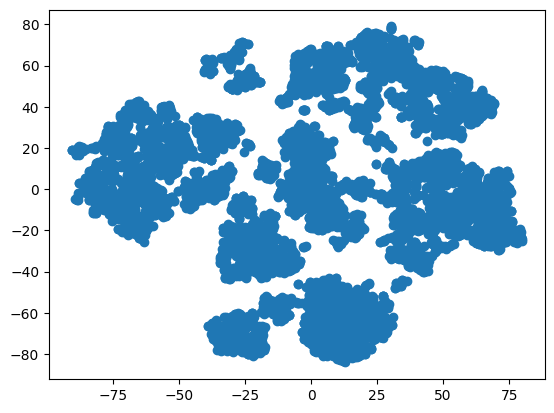

In [20]:
df_scaler=preprocessing.StandardScaler().fit_transform(df_log)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(df_scaler)
plt.scatter(data_2d[:,0], data_2d[:,1])

data divided into cluster but not good way

try another scaler

RobustScaler

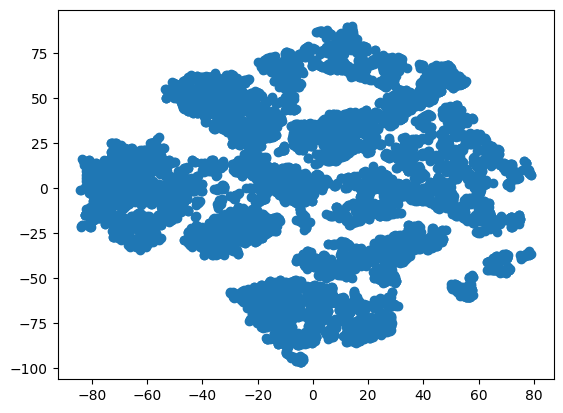

In [21]:
df_RobustScaler=preprocessing.RobustScaler().fit_transform(df_log)
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(df_RobustScaler)
plt.scatter(data_2d[:,0], data_2d[:,1])

there is no pattern for clustres number or postion 

try another scaler

MinMaxScaler

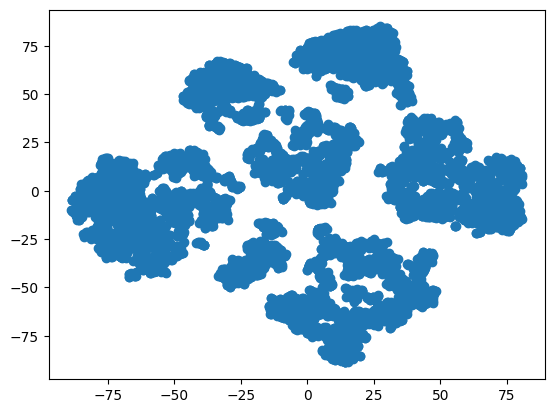

In [22]:
df_MinMaxScaler=preprocessing.MinMaxScaler().fit_transform(df_log)
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(df_MinMaxScaler)
plt.scatter(data_2d[:,0], data_2d[:,1])

the best for this data

##  <a id="k-means">K Means</a>


try kmean with inti k =5

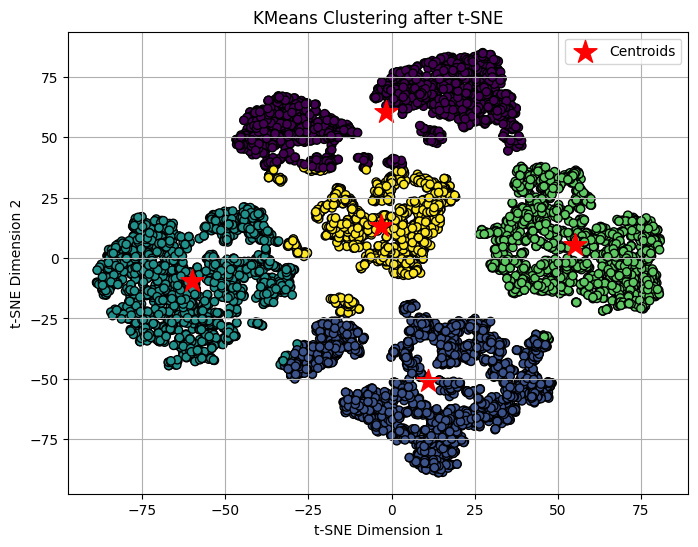

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df_MinMaxScaler)

# Perform KMeans clustering on the reduced data
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering after t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()


## 6. <a name="5">Training and hyperparamter tuning</a>
try elbow Method to select k 

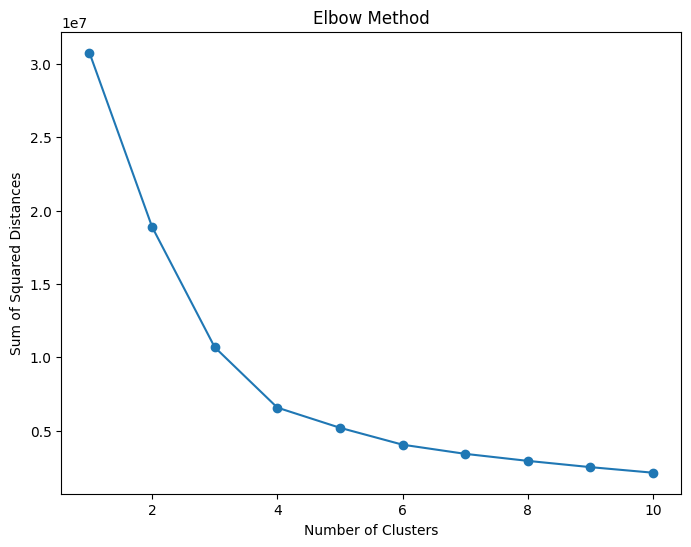

In [55]:

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tsne)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

from this plot k=4 

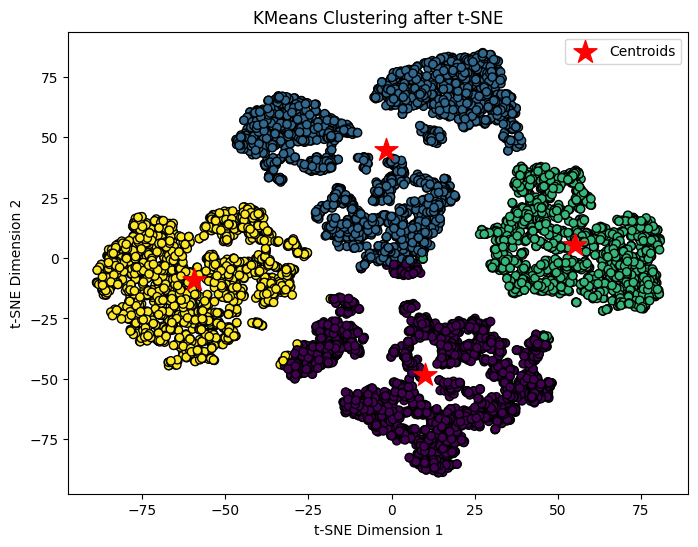

In [56]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_tsne)


# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering after t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

##  <a  id="bussines-meaning">Bussines meaning</a>


select important featute to every component 

<Axes: >

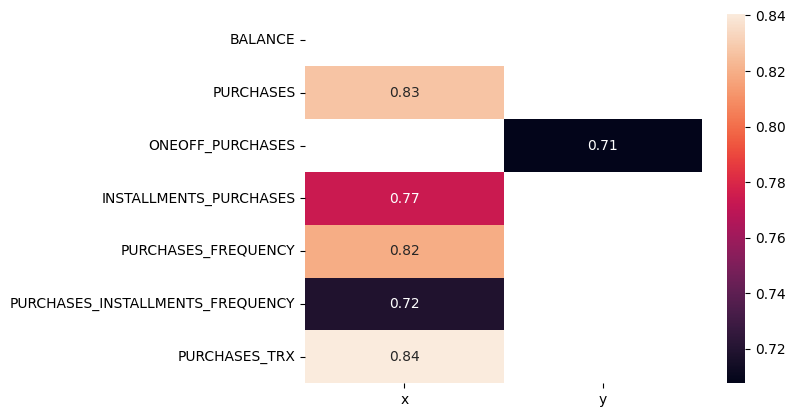

In [90]:
import seaborn as sns
corr=df_MinMaxScaler
df_corr = pd.DataFrame(corr, columns=df_log.columns)
df_corr["x"]=X_tsne[:, 0]   
df_corr["y"]=X_tsne[:, 1]
high_corr=df_corr.corr()[(df_corr.corr().abs() > 0.7) & (df_corr.corr().abs() < 1.0)  ]
# c
sns.heatmap(high_corr.iloc[:,-2:].drop_duplicates(), annot=True, fmt=".2f")



In [91]:
df_copy['Cluster'] = clusters
df_copy.groupby('Cluster').mean()[high_corr.iloc[:,-2:].drop_duplicates().index]



,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX
Cluster,,,,,,,
0,851.026193,525.741366,5.431097,521.221823,0.676419,0.637799,11.605892
1,1942.733116,1222.188091,944.428834,277.915073,0.492610,0.226640,15.736146
2,1220.072755,2476.047323,1514.860200,961.215154,0.814344,0.647697,34.566362
3,2153.385684,0.390776,0.025090,0.398139,0.001532,0.000922,0.017450


### General Description of Customer Clusters:

- **Cluster 0: Moderate Spenders**
  - Customers in this cluster have a moderate balance and make moderate purchases.
  - They tend to make purchases at a moderate frequency, with a mix of installment and one-off purchases.
  - Overall, they exhibit average spending behavior compared to other clusters.

- **Cluster 1: High Spenders with One-Off Purchases**
  - These customers have a relatively higher balance and make higher purchases compared to other clusters.
  - They prefer one-off purchases over installment purchases.
  - While they make purchases at a moderate frequency, their focus seems to be on larger one-off purchases.

- **Cluster 2: High Spenders with Balanced Purchases**
  - Customers in this cluster have a higher balance and are high spenders.
  - They make a significant portion of both one-off and installment purchases.
  - They make purchases more frequently compared to other clusters and engage in a diverse range of purchase transactions.

- **Cluster 3: Inactive Customers**
  - These customers have the highest balance but exhibit extremely low purchase activity.
  - They rarely make any purchases, and when they do, it's mostly installment purchases.
  - Their purchasing behavior indicates a lack of engagement with the provided services or products.



##  <a  id="#Anomaly-Detection">Anomaly Detection</a>


### using GaussianMixture


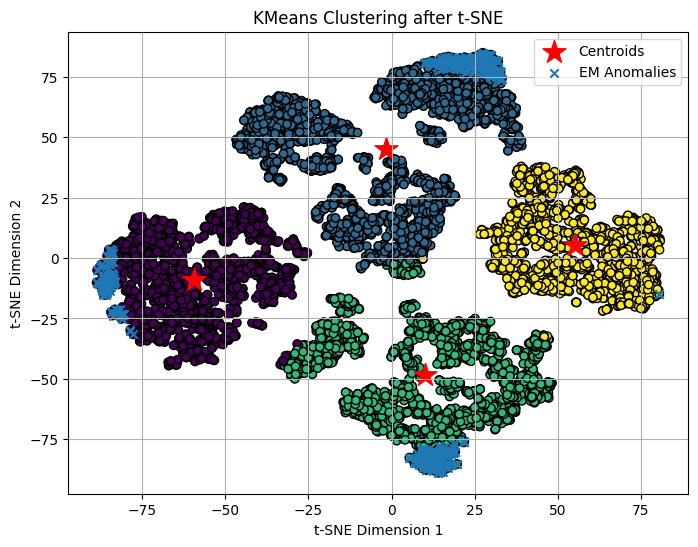

In [26]:
from sklearn.mixture import GaussianMixture
em = GaussianMixture()
em.fit(X_tsne)
em_scores = em.score_samples(X_tsne)  
em_threshold = np.percentile(em_scores, 5)  # 5th percentile as threshold
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.scatter(X_tsne[em_scores < em_threshold][:, 0], X_tsne[em_scores < em_threshold][:, 1], marker='x', label='EM Anomalies')
plt.title('KMeans Clustering after t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

### using dbscan

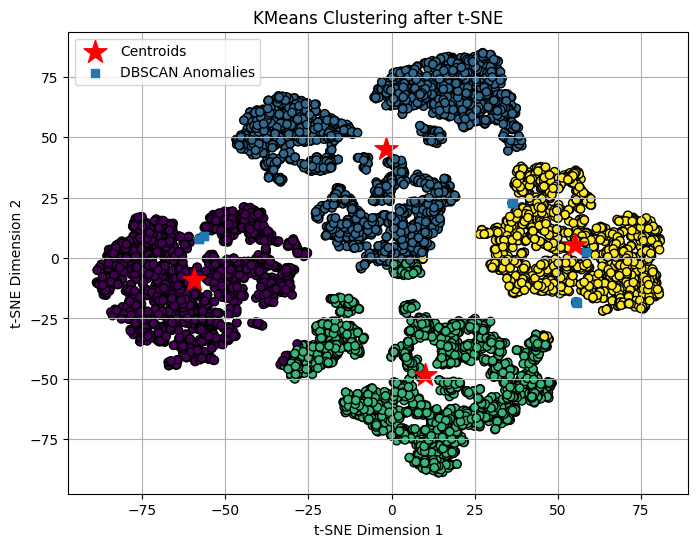

In [27]:
# Use DBSCAN for anomaly detection
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_tsne)
dbscan_anomalies = X_tsne[dbscan_clusters == -1]
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.scatter(dbscan_anomalies[:, 0], dbscan_anomalies[:, 1], marker='s', label='DBSCAN Anomalies')
plt.title('KMeans Clustering after t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

### using isolation forest

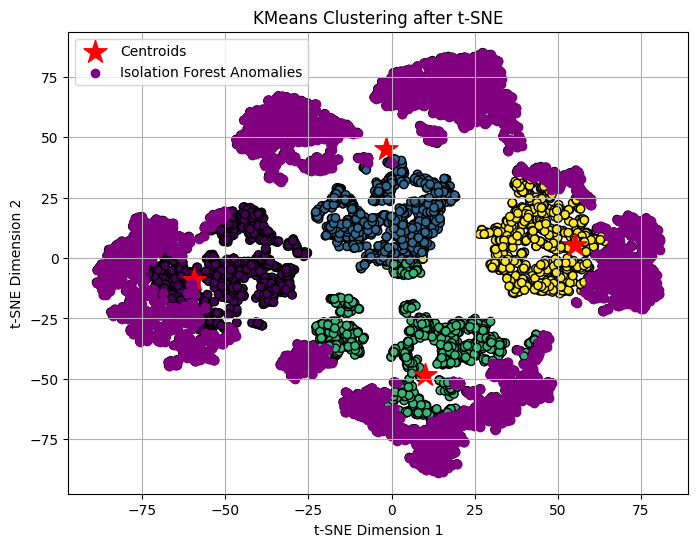

In [28]:
import numpy as np
from sklearn.ensemble import IsolationForest


isolation_forest = IsolationForest()
isolation_forest.fit(X_tsne)
isolation_forest_anomalies = X_tsne[isolation_forest.predict(X_tsne) == -1]

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.scatter(isolation_forest_anomalies[:, 0], isolation_forest_anomalies[:, 1],
            c='purple', marker='o', label='Isolation Forest Anomalies')
plt.title('KMeans Clustering after t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()




##  <a  id="#hierarchical-clustering">hierarchical clustering</a>


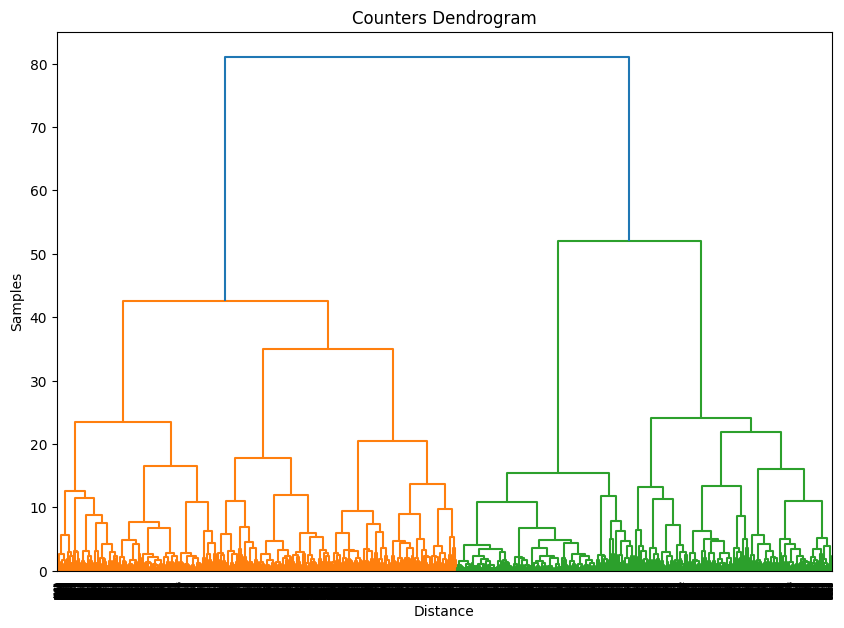

In [29]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Counters Dendrogram")
dend = shc.dendrogram(shc.linkage(y=df_MinMaxScaler, method='ward', metric='euclidean'))
# Fill y with your dataframe, method with linkage criteria ('ward', 'single', 'complete', 'average', etc.),
# and metric with distance function ('euclidean', 'manhattan', 'mahalanobis', etc.)
plt.xlabel('Distance')
plt.ylabel('Samples')
plt.show()


from this k=6

##  <a  id="#agglomerative-clustering">agglomerative clustering</a>


try to select k  using silhouette_score

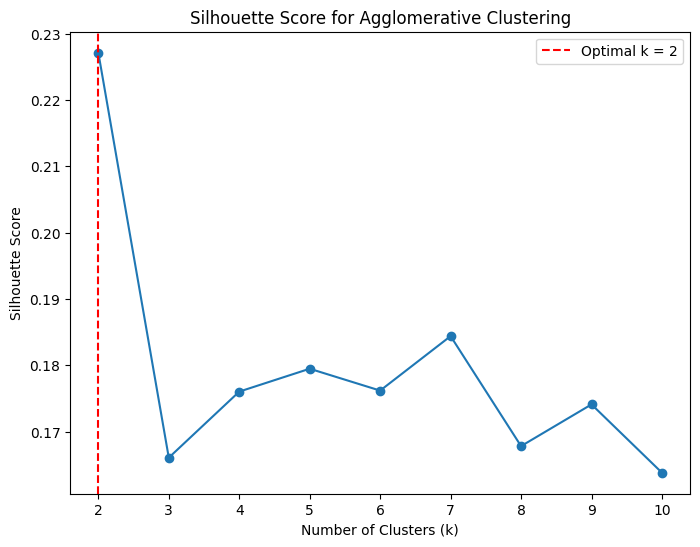

Optimal number of clusters (k): 2


In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


silhouette_scores = []
for k in range(2, 11):
    agglomerative_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    clusters = agglomerative_cluster.fit_predict(df_scaler)
    silhouette_scores.append(silhouette_score(df_scaler, clusters))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to index because k starts from 2
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()

plt.show()

print(f'Optimal number of clusters (k): {optimal_k}')


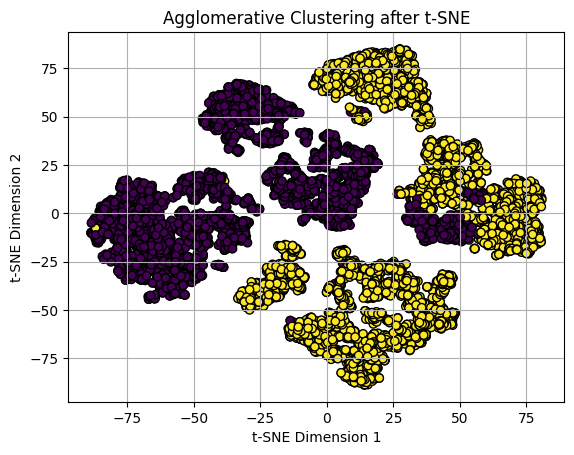

In [31]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
agglomerative_cluster.fit(df_MinMaxScaler)
clusters = agglomerative_cluster.labels_
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.title('Agglomerative Clustering after t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True)
plt.show()




from this i think k mean better 

##  <a id="improvement-ideas">improvement ideas</a>


### apply kmean using pca and kernel pca

#### pca

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_MinMaxScaler)

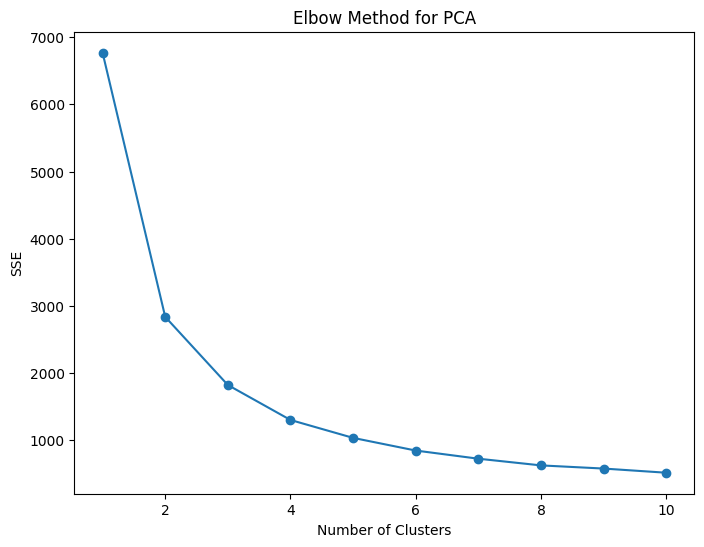

In [48]:


sse_pca = []
for k in range(1, 11):
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca)
    sse_pca.append(kmeans_pca.inertia_)

# Plot the Elbow Method for PCA
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse_pca, marker='o')
plt.title('Elbow Method for PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


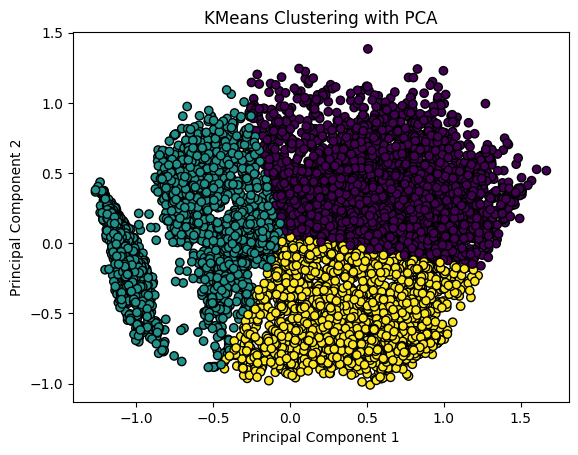

In [49]:
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_pca)
labels_pca = kmeans_pca.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', edgecolors='k')
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




pca separates data into 3 cluster in good way

#### kernel pca

In [50]:

from sklearn.decomposition import KernelPCA


kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kernel_pca = kernel_pca.fit_transform(df_MinMaxScaler)

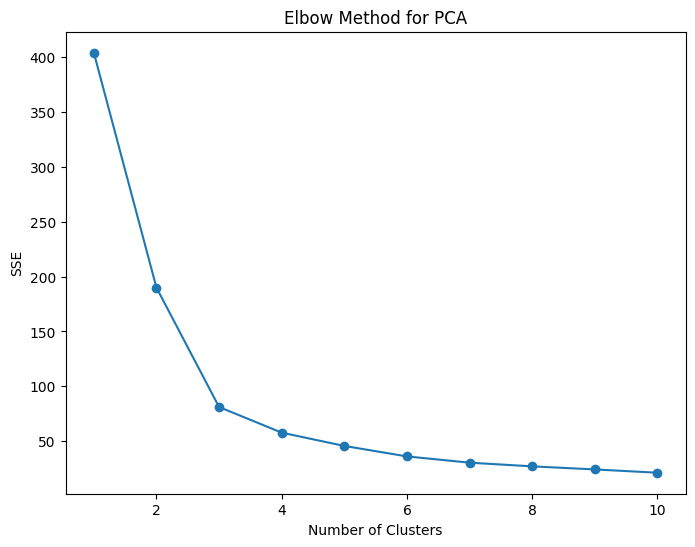

In [51]:


# Calculate SSE for different numbers of clusters using PCA
sse_pca = []
for k in range(1, 11):
    kmeans_pca = KMeans(n_clusters=k)
    kmeans_pca.fit(X_kernel_pca)
    sse_pca.append(kmeans_pca.inertia_)

# Plot the Elbow Method for PCA
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse_pca, marker='o')
plt.title('Elbow Method for PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()


Text(0, 0.5, 'Kernel Principal Component 2')

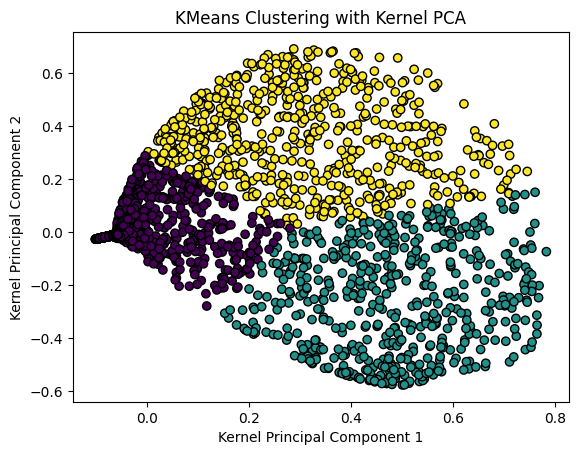

In [52]:
kmeans_kernel_pca = KMeans(n_clusters=3)
kmeans_kernel_pca.fit(X_kernel_pca)
labels_kernel_pca = kmeans_kernel_pca.labels_
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=labels_kernel_pca, cmap='viridis', edgecolors='k')
plt.title('KMeans Clustering with Kernel PCA')
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')

kernel pca separates data into 3 cluster in good way
